Corner detection is problem of detecting corner points in an image. The basic idea is to find large change in intensity. The change has to be in direction (say change in direction of line). By using a sliding window method, we detect the change in direction. </br>
Corner detection is robust to rotation, localization but not for scaling (change in image dimension can lead to loss of edge).

</br>
Original: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

In [1]:
import cv2
import numpy as np
from PIL import Image
import imutils

# 1. Harris Corner Detection

In [ ]:
cvimg = cv2.imread("/content/go_board.jpg")
cvimg = imutils.resize(cvimg, width=700)
gray = cv2.cvtColor(cvimg,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

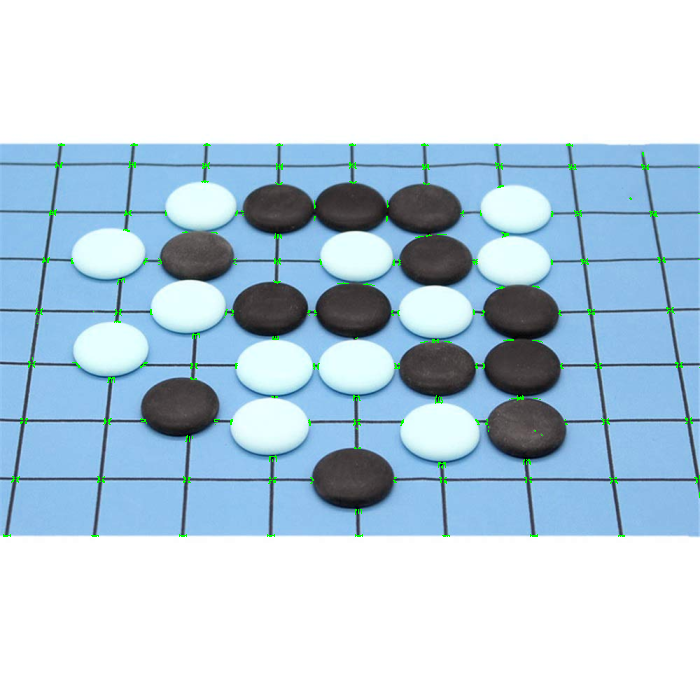

In [ ]:
# 0.001 is a threshold for choosing optimal points

points = cv2.cornerHarris(gray,2,3,0.04)
cvimg[points>0.001*points.max()] = [0,255,0]
Image.fromarray(cvimg)

In [ ]:
cvimg = cv2.imread("/content/doom.jpeg")
cvimg = imutils.resize(cvimg, height=500)

Harris Corner Detection


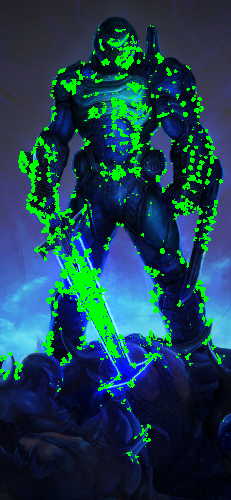

In [ ]:
gray = cv2.cvtColor(cvimg,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray,3,3,0.04)
cvimg[dst>0.001*dst.max()] = [0,255,0]
print("Harris Corner Detection")
Image.fromarray(cvimg)

# 2. Shi-Tomasi Corner Detector

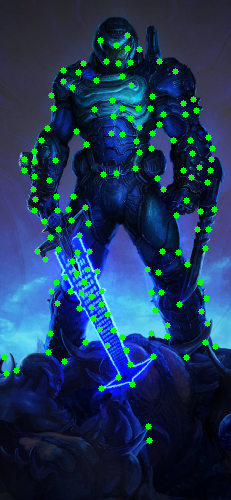

In [ ]:
cimg = cvimg.copy()
gray = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)

points = cv2.goodFeaturesToTrack(gray,150,0.01,10)
    
points = np.int0(points)

for point in points:
       
    x,y = point.ravel()
    cv2.circle(cimg,(x,y),3,[0,255,0],-1)
Image.fromarray(cimg)    

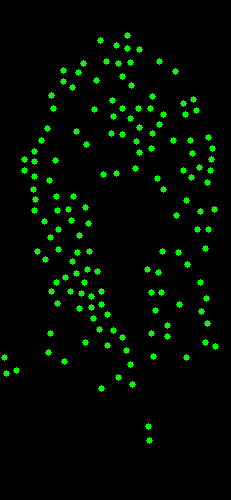

In [ ]:
# only corners

img = np.zeros((cimg.shape[0], cimg.shape[1], 3), np.uint8)
img[:, :] = 0 
for point in points:
       
    x,y = point.ravel()
    cv2.circle(img,(x,y),3,[0,255,0],-1)
Image.fromarray(img)    

# 3. FAST (Features from Accelerated Segment Test) Corner Detection
It can be used in real time aplication and also on lower power devices. Found [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_fast/py_fast.html)